In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [21]:
new_df=pd.read_csv("hiring.csv")
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
new_df.experience=new_df.experience.fillna("zero")
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
new_df.experience=new_df.experience.apply(w2n.word_to_num)
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [29]:
import math
#print(new_df['test_score(out of 10)'].mean())
median_test_score=math.floor(new_df['test_score(out of 10)'].mean())
median_test_score

7

In [34]:
new_df['test_score(out of 10)']=new_df['test_score(out of 10)'].fillna(median_test_score)
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


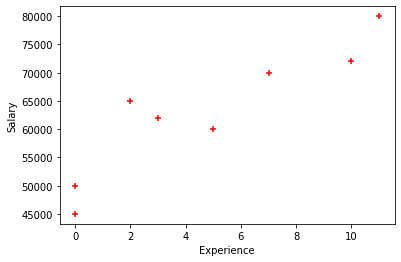

In [37]:
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.scatter(new_df['experience'],new_df['salary($)'],color='red',marker='+')

In [38]:
model=linear_model.LinearRegression()
model.fit(new_df.drop('salary($)',axis='columns'),new_df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

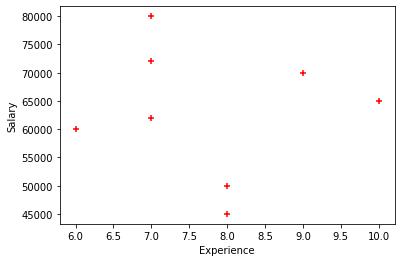

In [40]:
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.scatter(new_df['test_score(out of 10)'],new_df['salary($)'],color='red',marker='+')

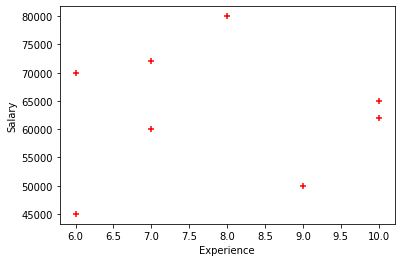

In [43]:
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.scatter(new_df['interview_score(out of 10)'],new_df['salary($)'],color='red',marker='+')

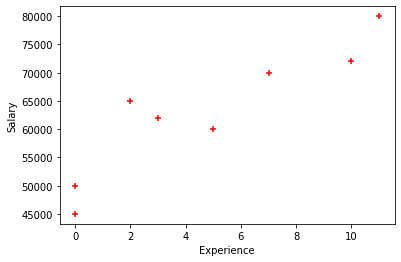

In [46]:
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.scatter(new_df['experience'],new_df['salary($)'],color='red',marker='+')

In [48]:
model.predict([[2,9,6]])

array([53713.86677124])

In [51]:
model.predict([[12,10,10]])

array([93747.79628651])

In [53]:
model.score(new_df.drop('salary($)',axis='columns'),new_df['salary($)'])

0.9770139014273139